# 決定木のアンサンブル
アンサンブル法（Ensembles）とは、複数の機械学習モデルを組み合わせることで、より強力なモデルを構築する手法  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
%matplotlib notebook
%matplotlib inline

## 2.3.6.1 ランダムフォレスト
少しずつ異なる決定木をたくさん集めたもの  
個々の決定木はある程度ターゲット値を予測できていて、さらにお互いに違っていなければならない

### ランダムフォレストの構築

### ランダムフォレストの解析

In [3]:
#  two_moonsデータセットに、決定木５個のランダムフォレストを適用

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

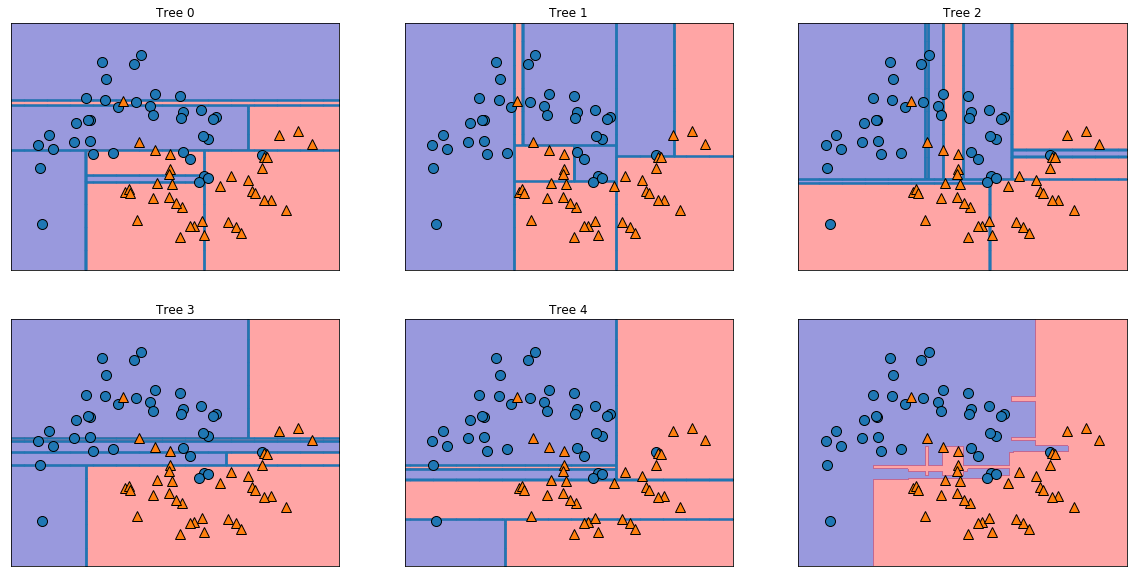

In [8]:
# ランダムフォレストの一部として構築された決定木はestimator_属性に格納されている
# それぞれの決定木で学習された決定境界と
# ランダムフォレストによって行われる集合的な予測を可視化
# ５つの決定木が学習した決定境界は相互に異なる

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# 決定木
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
# ランダムフォレスト
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [11]:
# cancerデータセットに対して、決定木１００個のランダムフォレストを適用
# 精度９７%ととても高い
# ランダムフォレストはデフォルトのパラメータで機能する

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


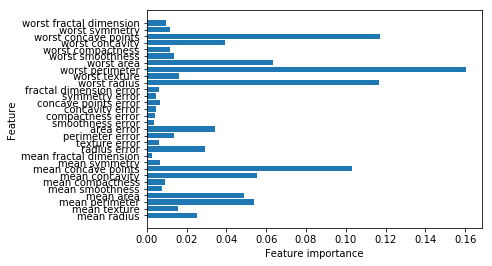

In [14]:
# 特徴量の重要度を見ることができる
# 個々の決定木の特徴量の重要度を平均したもの
# 決定木の場合よりも多くの特徴量に対して０以上の重要度を与えている

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(forest)

### 長所、短所、パラメータ
回帰でもクラス分類でも、ランダムフォレストが現在最も広く使われている機械学習手法  
多くの場合、パラメータチューニングをせずに使える、データのスケール変換の必要もない  
random_stateを設定しないと、構築されるモデルが大きく変わる可能性がある  
テキストデータなどの非常に高次元で疎なデータに対してはうまく機能しない傾向にある  

## 2.3.6.2 勾配ブースティング回帰木（勾配ブースティングマシン）